In [53]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import eig

In [54]:
# defining a simple data
Marks = np.array([[3,4], [2,8], [6,9]])
print(Marks)

[[3 4]
 [2 8]
 [6 9]]


In [55]:
Marks_df = pd.DataFrame(Marks,columns=["Physics","Maths"])
Marks_df

,Physics,Maths
0,3,4
1,2,8
2,6,9


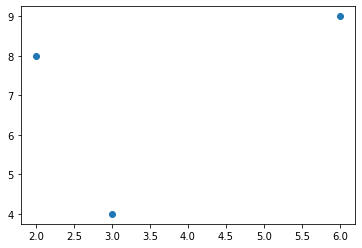

In [56]:
plt.scatter(Marks_df["Physics"],Marks_df["Maths"])

In [58]:
#makind data mean centric
Meanbycolumn = np.mean(Marks.T, axis=1)
print(Meanbycolumn)

Scaled_Data = Marks - Meanbycolumn


[3.66666667 7.        ]


In [57]:
Marks.T

array([[3, 2, 6],
       [4, 8, 9]])

In [59]:
Scaled_Data


array([[-0.66666667, -3.        ],
       [-1.66666667,  1.        ],
       [ 2.33333333,  2.        ]])

In [60]:
#Find covariance matrix of above scaled data
Cov_mat = np.cov(Scaled_Data.T)
Cov_mat

array([[4.33333333, 2.5       ],
       [2.5       , 7.        ]])

In [61]:
#Find corresponding eigen value and eigen vector of above covariance matrix
Eval, Evec = eig(Cov_mat)
print(Eval)
print(Evec)

[2.83333333 8.5       ]
[[-0.85749293 -0.51449576]
 [ 0.51449576 -0.85749293]]


In [64]:
#Get Original Data Projected to principam components as new axis
Projected_data = Evec.T.dot(Scaled_Data.T)
print(Projected_data.T)

[[-9.71825316e-01  2.91547595e+00]
 [ 1.94365063e+00  1.11022302e-16]
 [-9.71825316e-01 -2.91547595e+00]]


In [66]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit_transform(Marks)

array([[ 2.91547595e+00, -9.71825316e-01],
       [-6.86635020e-16,  1.94365063e+00],
       [-2.91547595e+00, -9.71825316e-01]])

In [67]:
pca.explained_variance_ratio_ #variance explanation ratio by each PC

array([0.75, 0.25])

In [68]:
#DataFrame for PC
PCDF = pd.DataFrame(data = pca.fit_transform(Marks), columns = ['PC1', 'PC2']) 

In [69]:
PCDF

,PC1,PC2
0,2.915476e+00,-0.971825
1,-6.866350e-16,1.943651
2,-2.915476e+00,-0.971825


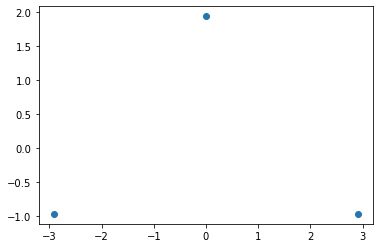

In [34]:
plt.scatter(PCDF["PC1"],PCDF["PC2"])

In [71]:
#inverse transform
pca.inverse_transform(pca.fit_transform(Marks))

array([[3., 4.],
       [2., 8.],
       [6., 9.]])

In [70]:
#How much weight each variable has in principal components
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'],index=["Physics","Maths"])
loadings

,PC1,PC2
Physics,-0.514496,-0.857493
Maths,-0.857493,0.514496
